

---


# **STOCK MARKET PREDICTION USING NUMERICAL AND TEXTUAL ANALYSIS**

## **AUTHOR - AKSHAYA RAJ S A**

---



# **IMPORTING LIBRARIES AND DATASET**


---


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from nltk.corpus import stopwords
from sklearn import *
from keras import *
import re

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AMZN.csv to AMZN.csv
Saving india-news-headlines.csv to india-news-headlines.csv


In [ ]:
import io
stock = pd.read_csv(io.BytesIO(uploaded['AMZN.csv']))
news = pd.read_csv(io.BytesIO(uploaded['india-news-headlines.csv']))



---
# **DATA EXPLORATION AND TRANSFORMATION**


---





In [ ]:
print(stock.info())
print(news.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6044 entries, 0 to 6043
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6044 non-null   object 
 1   Open       6044 non-null   float64
 2   High       6044 non-null   float64
 3   Low        6044 non-null   float64
 4   Close      6044 non-null   float64
 5   Adj Close  6044 non-null   float64
 6   Volume     6044 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 330.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034212 entries, 0 to 1034211
Data columns (total 3 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   publish_date       1034212 non-null  int64 
 1   headline_category  1034212 non-null  object
 2   headline_text      1034212 non-null  object
dtypes: int64(1), object(2)
memory usage: 23.7+ MB
None


In [197]:
news = news.drop(['headline_category'], 1)

In [ ]:
stock.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [ ]:
news.head(5)

,publish_date,headline_text
0,20010102,Status quo will not be disturbed at Ayodhya; s...
1,20010102,Fissures in Hurriyat over Pak visit
2,20010102,America's unwanted heading for India?
3,20010102,For bigwigs; it is destination Goa
4,20010102,Extra buses to clear tourist traffic


In [ ]:
from datetime import datetime
news['publish_date'] = pd.to_datetime(news['publish_date'], format='%Y%m%d').dt.strftime("%Y-%m-%d")
news['publish_date'] = pd.to_datetime(news['publish_date']).dt.normalize()
stock['Date'] = pd.to_datetime(stock['Date']).dt.normalize()


In [201]:
news.head(5)

,publish_date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic


In [202]:
print(stock.info())
print(news.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6044 entries, 0 to 6043
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6044 non-null   datetime64[ns]
 1   Open       6044 non-null   float64       
 2   High       6044 non-null   float64       
 3   Low        6044 non-null   float64       
 4   Close      6044 non-null   float64       
 5   Adj Close  6044 non-null   float64       
 6   Volume     6044 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 330.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034212 entries, 0 to 1034211
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   publish_date   1034212 non-null  datetime64[ns]
 1   headline_text  1034212 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 15.8+ MB
None


In [203]:
print(" SHAPE OF STOCK DATAFRAME : ", stock.shape)
print(" SHAPE OF NEWS DATAFRAME  : ", news.shape)


 SHAPE OF STOCK DATAFRAME :  (6044, 7)
 SHAPE OF NEWS DATAFRAME  :  (1034212, 2)


In [204]:
news = news[news.publish_date.isin(stock.Date)]

In [205]:
stock = stock[stock.Date.isin(news.publish_date)]

In [206]:
print(len(set(stock.Date)))
print(len(set(news.publish_date)))

2487
2487


In [207]:
stock.set_index('Date', inplace= True)
stock = stock.sort_index(ascending=True, axis=0)

In [208]:
news.set_index('publish_date', inplace= True)
news = news.sort_index(ascending=True, axis=0)



---
# **SENTIMENT ANALYSIS**


---





In [210]:
stock_news = pd.concat([stock, news], axis=1)
stock_news.dropna(axis=0, inplace=True)
stock_news.head(20)

,Open,High,Low,Close,Adj Close,Volume,headline_text
2001-01-02,15.8125,16.0,13.625,13.875,13.875,9203500,Status quo will not be disturbed at Ayodhya; s...
2001-01-02,15.8125,16.0,13.625,13.875,13.875,9203500,Fissures in Hurriyat over Pak visit
2001-01-02,15.8125,16.0,13.625,13.875,13.875,9203500,America's unwanted heading for India?
2001-01-02,15.8125,16.0,13.625,13.875,13.875,9203500,For bigwigs; it is destination Goa
2001-01-02,15.8125,16.0,13.625,13.875,13.875,9203500,Extra buses to clear tourist traffic
2001-01-02,15.8125,16.0,13.625,13.875,13.875,9203500,Dilute the power of transfers; says Riberio
2001-01-02,15.8125,16.0,13.625,13.875,13.875,9203500,Focus shifts to teaching of Hindi
2001-01-02,15.8125,16.0,13.625,13.875,13.875,9203500,IT will become compulsory in schools
2001-01-02,15.8125,16.0,13.625,13.875,13.875,9203500,Move to stop freedom fighters' pension flayed
2001-01-02,15.8125,16.0,13.625,13.875,13.875,9203500,Gilani claims he applied for passport 2 years ago


In [211]:
from textblob import TextBlob
polarity = []
subjectivity = []
for idx, row in stock_news.iterrows():
  polarity.append(TextBlob(row['headline_text']).sentiment[0])
  subjectivity.append(TextBlob(row['headline_text']).sentiment[1])

In [212]:
stock_news['polarity'] = polarity
stock_news['subjectivity'] = subjectivity

In [213]:
stock_news['Price'] = round((stock_news['High'] + stock_news['Low'] + stock_news['Close']) / 3 , 2)


In [214]:
stock_news = stock_news.drop(['headline_text'], 1)

In [215]:
stock_news.head(10)

,Open,High,Low,Close,Adj Close,Volume,polarity,subjectivity,Price
2001-01-02,15.8125,16.0,13.625,13.875,13.875,9203500,0.00,0.000000,14.5
2001-01-02,15.8125,16.0,13.625,13.875,13.875,9203500,0.00,0.000000,14.5
2001-01-02,15.8125,16.0,13.625,13.875,13.875,9203500,0.00,0.000000,14.5
2001-01-02,15.8125,16.0,13.625,13.875,13.875,9203500,0.00,0.000000,14.5
2001-01-02,15.8125,16.0,13.625,13.875,13.875,9203500,0.05,0.241667,14.5
2001-01-02,15.8125,16.0,13.625,13.875,13.875,9203500,0.00,0.000000,14.5
2001-01-02,15.8125,16.0,13.625,13.875,13.875,9203500,0.00,0.000000,14.5
2001-01-02,15.8125,16.0,13.625,13.875,13.875,9203500,0.00,0.000000,14.5
2001-01-02,15.8125,16.0,13.625,13.875,13.875,9203500,0.00,0.000000,14.5
2001-01-02,15.8125,16.0,13.625,13.875,13.875,9203500,0.00,0.000000,14.5


Text(0, 0.5, 'Close Price (INR)')

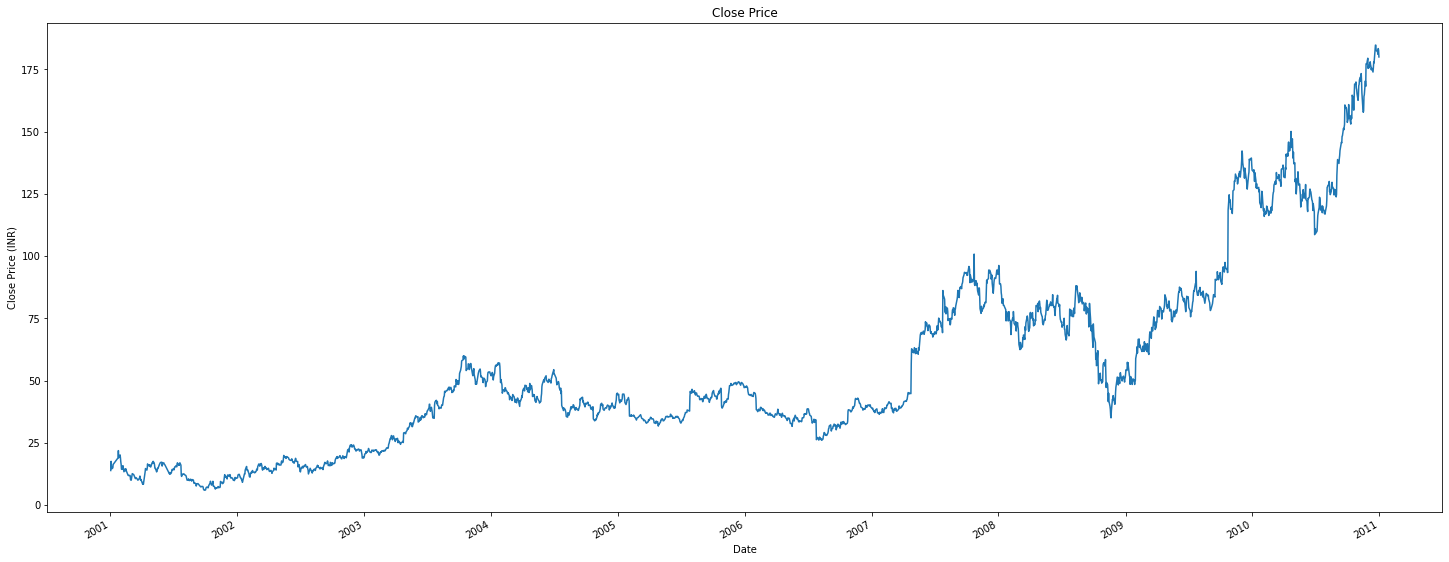

In [216]:
plt.figure(figsize=(25,10))
stock_news['Close'].plot()
plt.title("Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')

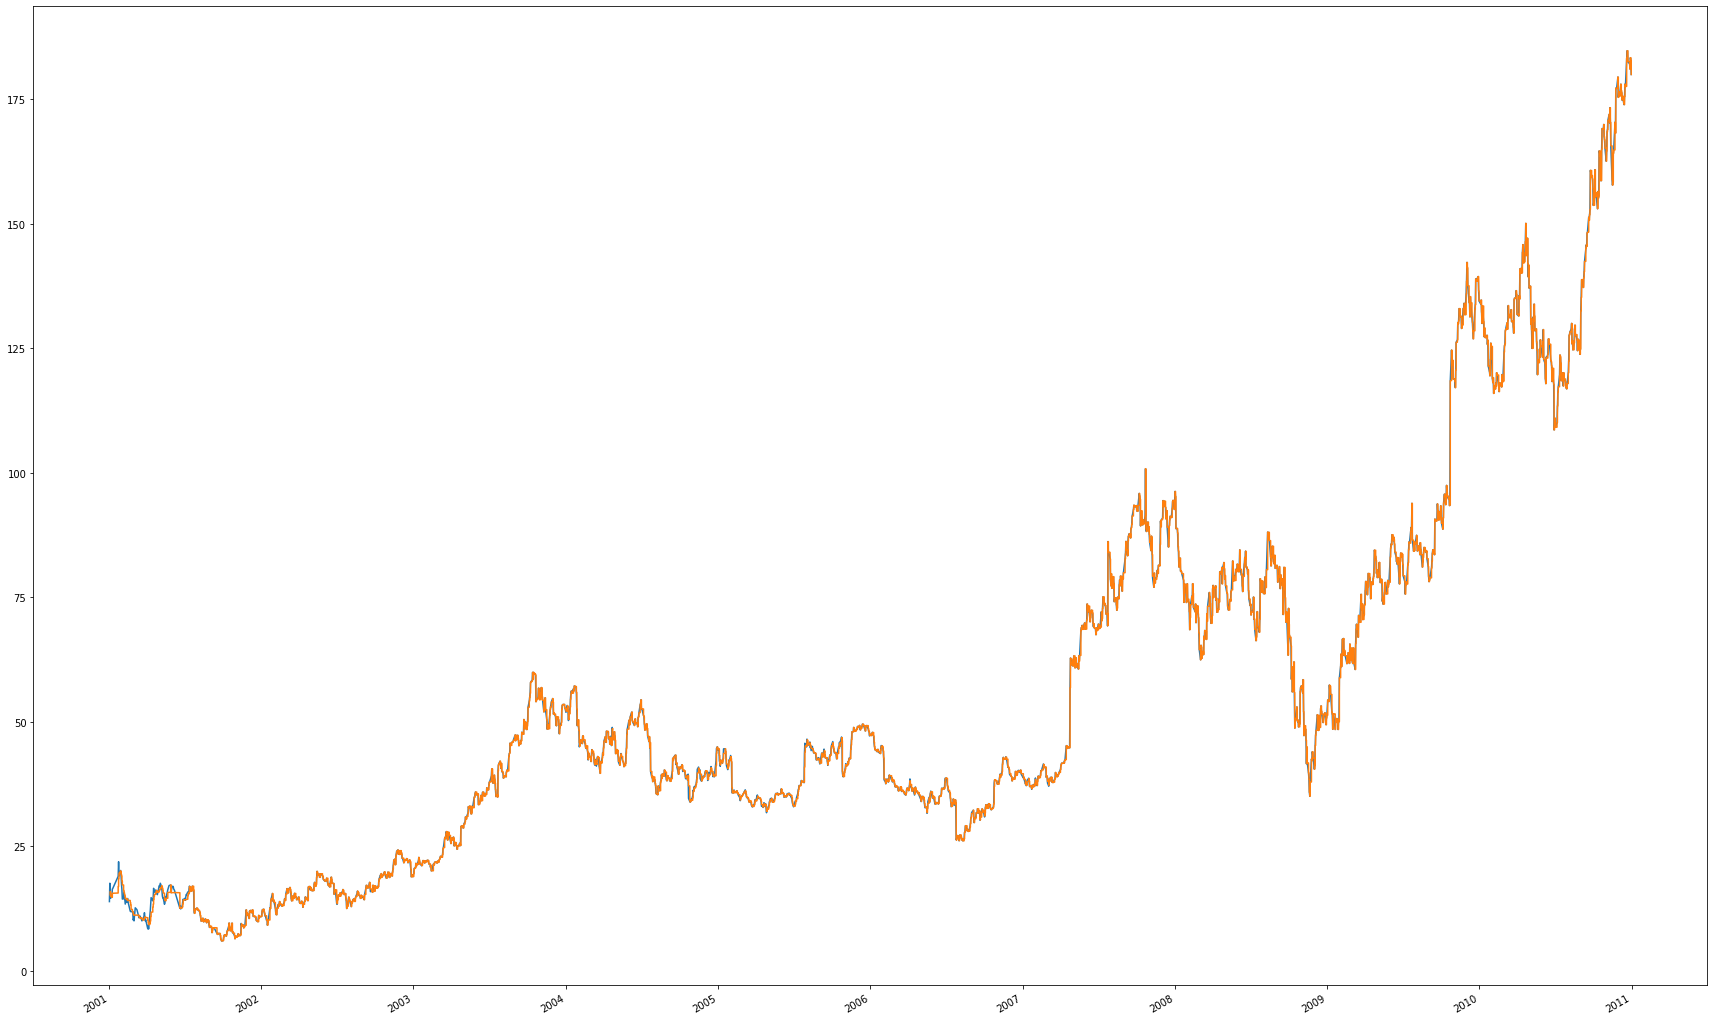

In [217]:
plt.figure(figsize=(30,20))
stock_news['Close'].plot()
stock_news.rolling(window=200).mean()['Close'].plot()



---
# **SPLITTING DATASET INTO TEST AND TRAIN**


---





In [218]:
X = stock_news.drop(['Price','Close'], axis = 1)
Y = stock_news[['Price','Close']]

In [ ]:
from sklearn.model_selection import ShuffleSplit

split = ShuffleSplit(n_splits=10, test_size=0.1, random_state=42)
for train_index, test_index in split.split(X, Y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]



---
# **TRAINING THE MODEL - RANDOM FOREST**


---





In [ ]:
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state = 42, n_estimators = 500, criterion='mse', max_depth = 30, min_samples_leaf=2,
                            min_samples_split=5, n_jobs=1)

In [219]:
model_chain = RegressorChain(model)
model_chain.fit(X_train, Y_train)
print(" SUCCESSFULLY IMPLEMENTED")

 SUCCESSFULLY IMPLEMENTED


In [220]:
pred = model_chain.predict(X_test)
Y_pred = []
for x in range(len(pred)):
  Y_pred.append([round(pred[x][0], 2),round(pred[x][1], 2) ])

In [221]:
Predictions = pd.DataFrame({'Actual_Price': Y_test['Price'], 'Actual_Close': Y_test['Close'], 'Predicted_Price': list(list(zip(*Y_pred))[0]), 'Predicted_Close': list(list(zip(*Y_pred))[1])})  
Predictions.tail(5)

,Actual_Price,Actual_Close,Predicted_Price,Predicted_Close
2010-12-08,176.55,176.289993,176.55,176.29
2007-07-25,86.21,86.180000,86.21,86.18
2004-12-29,44.98,44.820000,44.98,44.82
2009-01-22,49.69,49.939999,49.69,49.94
2003-12-11,50.38,50.799999,50.38,50.80




---

# **EVALUATION**

---



# **Coefficient of determination**

In [194]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)


0.9999999998517033